<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [26]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [28]:
data = pd.read_csv('./train.csv')

In [29]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [30]:
print('Number of train files: {}'.format(len(data)))

Number of train files: 5282


In [31]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [11]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
data.info()
nanK = 0
for i in range(len(data)):
  if np.isnan(data['TotalSpent'][i]):
    nanK += 1
print('The number NaN in TotalSpent: {}'.format(nanK))
data.isna().mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

ClientPeriod                0.000000
MonthlySpending             0.000000
TotalSpent                  0.001704
Sex                         0.000000
IsSeniorCitizen             0.000000
HasPartner                  0.000000
HasChild                    0.000000
HasPhoneService             0.000000
HasMultiplePhoneNumbers     0.000000
HasInternetService          0.000000
HasOnlineSecurityService    0.000000
HasOnlineBackup             0.000000
HasDeviceProtection         0.000000
HasTechSupportAccess        0.000000
HasOnlineTV                 0.000000
HasMovieSubscription        0.000000
HasContractPhone            0.000000
IsBillingPaperless          0.000000
PaymentMethod               0.000000
Churn                       0.000000
dtype: float64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

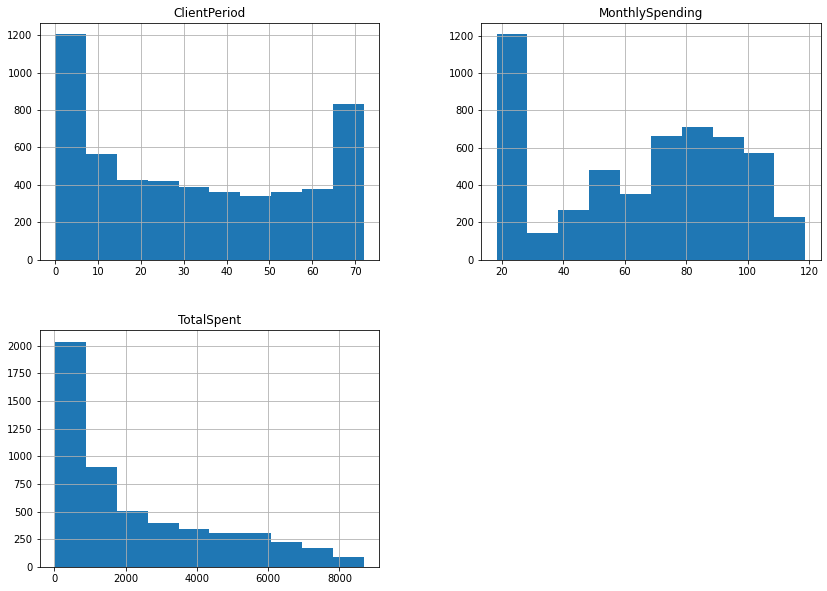

In [12]:
dataNum = data[num_cols]

dataNum.hist(figsize=(14,10))
None

In [13]:
for col in cat_cols:
  print(f"{col} DISTRIBUTION")
  print(data[col].value_counts())
  print()

Sex DISTRIBUTION
Male      2655
Female    2627
Name: Sex, dtype: int64

IsSeniorCitizen DISTRIBUTION
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

HasPartner DISTRIBUTION
No     2705
Yes    2577
Name: HasPartner, dtype: int64

HasChild DISTRIBUTION
No     3676
Yes    1606
Name: HasChild, dtype: int64

HasPhoneService DISTRIBUTION
Yes    4761
No      521
Name: HasPhoneService, dtype: int64

HasMultiplePhoneNumbers DISTRIBUTION
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

HasInternetService DISTRIBUTION
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

HasOnlineSecurityService DISTRIBUTION
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

HasOnlineBackup DISTRIBUTION
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dty

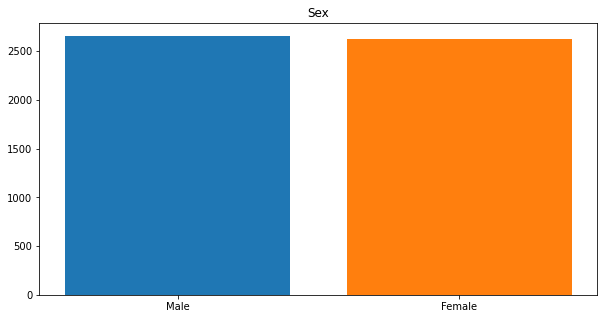

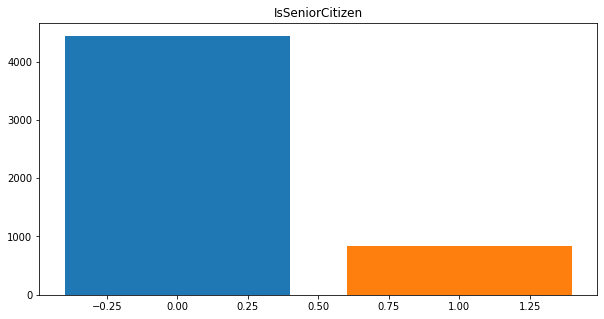

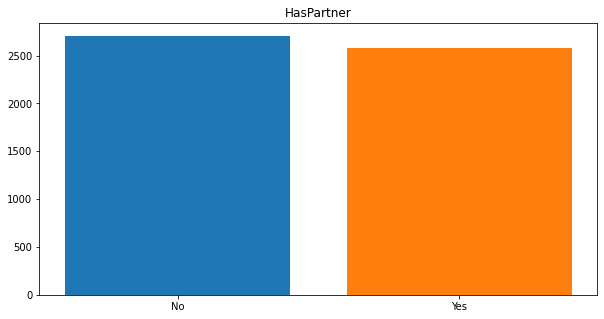

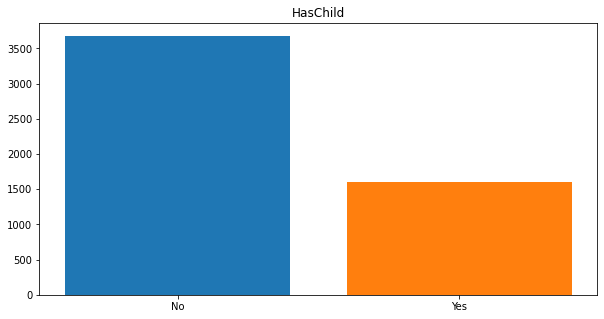

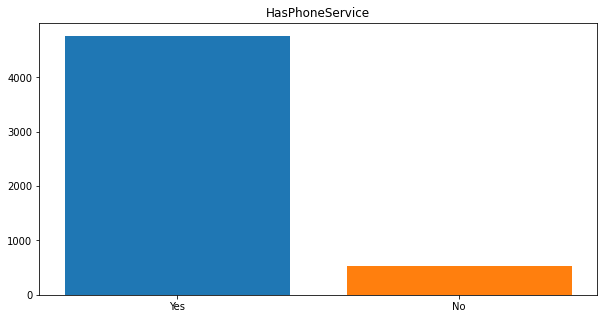

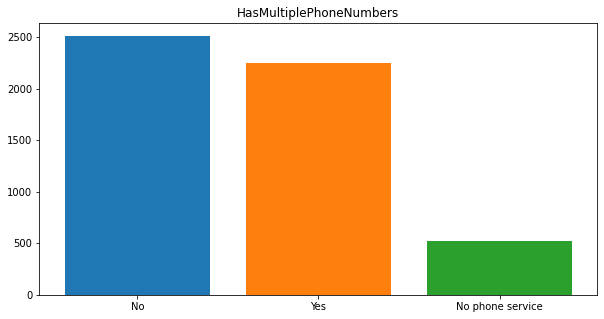

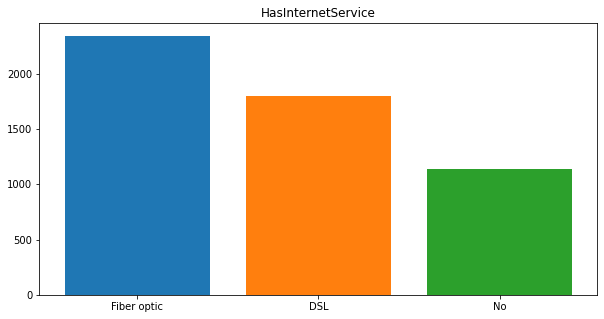

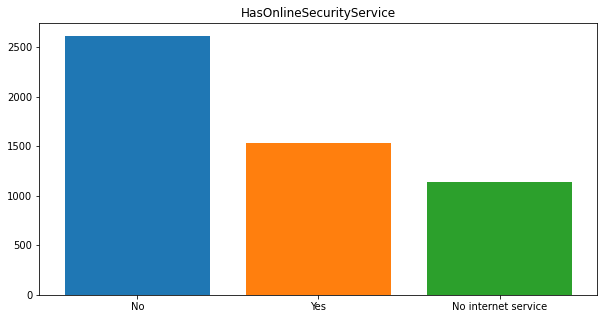

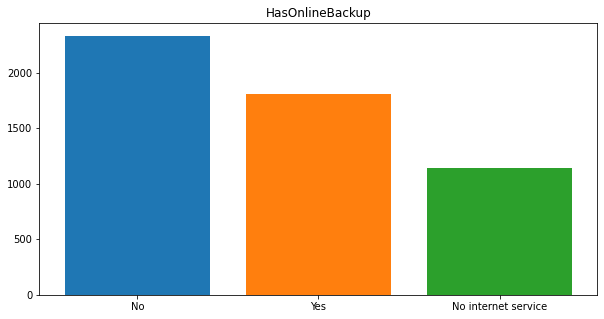

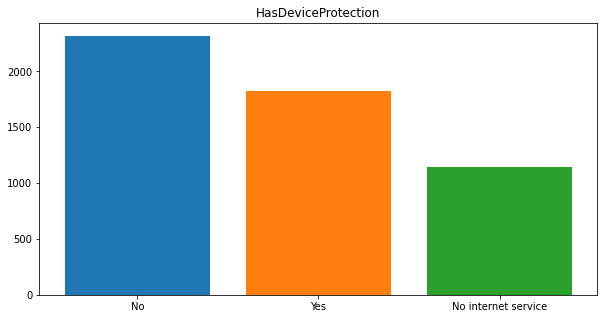

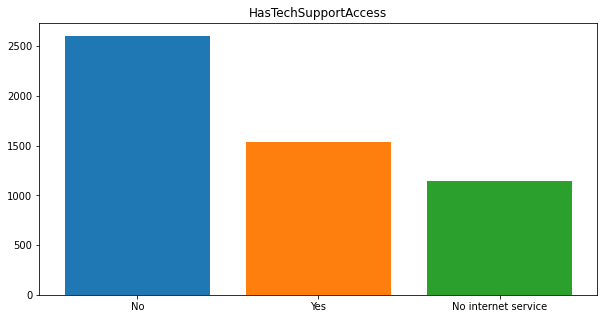

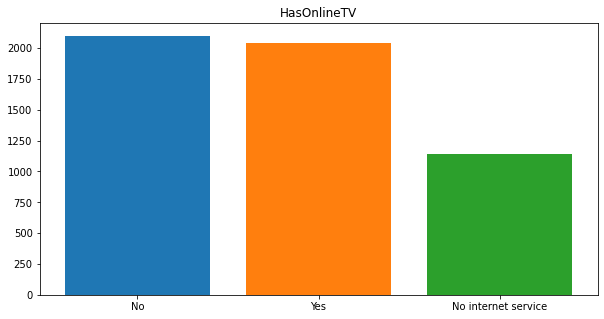

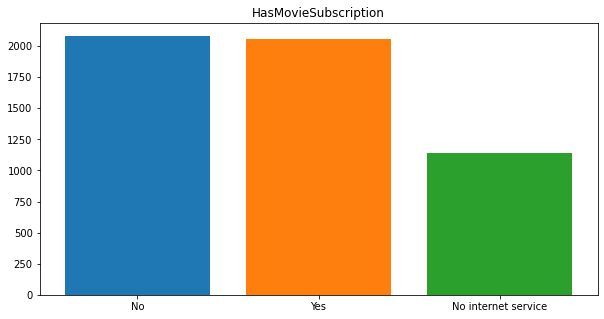

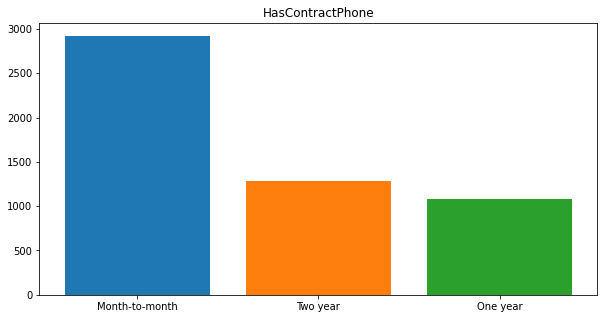

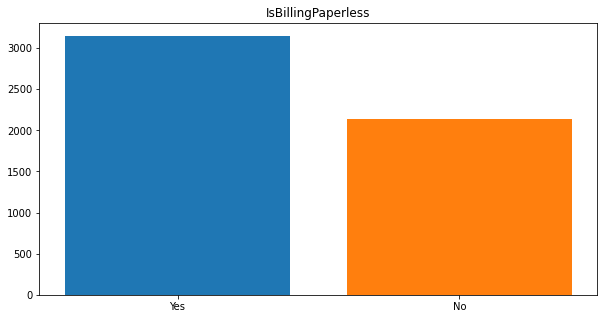

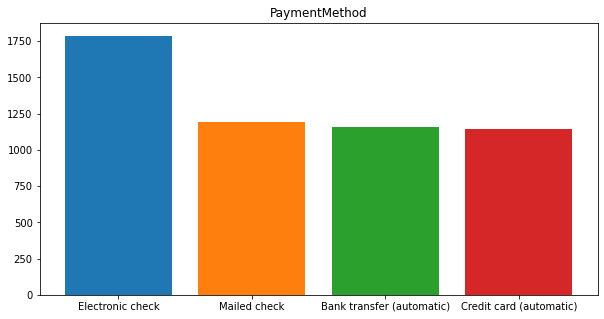

In [14]:
for i in range(len(cat_cols)):
  A = data[cat_cols[i]].value_counts()
  a = np.array([])
  k = 0
  plt.subplots(1,1, figsize=(10,5))
  for k in range(0, len(A)):
    plt.bar(A.index[k], A[A.index[k]])
    plt.title(cat_cols[i])


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [15]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [16]:
data = data.dropna()
dataNum = data[num_cols]
dataCat = data[cat_cols]

In [17]:
dummy_features = pd.get_dummies(dataCat)

In [18]:
X = pd.concat([dataNum, dummy_features], axis=1)
X_origin = data.iloc[:, :-1]

In [19]:
y = data['Churn']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [21]:
cls = make_pipeline(
    StandardScaler(),
    LogisticRegressionCV(refit=True)
)
cls = cls.fit(X_train, y_train)
preds_train = cls.predict(X_train)

scroing = roc_auc_score(y_train, preds_train)
scroing

0.7261311633567158

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [33]:
X_origin.values

array([[55, 19.5, 1026.35, ..., 'One year', 'No', 'Mailed check'],
       [72, 25.85, 1872.2, ..., 'Two year', 'No',
        'Credit card (automatic)'],
       [1, 75.9, 75.9, ..., 'Month-to-month', 'Yes', 'Electronic check'],
       ...,
       [1, 55.05, 55.05, ..., 'Month-to-month', 'No', 'Mailed check'],
       [29, 76.0, 2215.25, ..., 'Month-to-month', 'Yes',
        'Credit card (automatic)'],
       [19, 75.9, 1375.6, ..., 'Month-to-month', 'Yes', 'Mailed check']],
      dtype=object)

In [22]:
import catboost

In [23]:
X_train_origin, X_test_origin, y_train, y_test = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [24]:
cat_cols_indices = np.array([])
ind = 0
for name in X_origin.columns:
  for k in range(len(cat_cols)):
    if name == cat_cols[k]:
      cat_cols_indices = np.append(cat_cols_indices, ind)
  ind += 1
cat_cols_indices = cat_cols_indices.astype(int)
cat_cols_indices

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [25]:
boosting_model = catboost.CatBoostClassifier(n_estimators=500, cat_features=cat_cols_indices)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.035967
0:	learn: 0.6689585	total: 180ms	remaining: 1m 29s
1:	learn: 0.6480367	total: 229ms	remaining: 57s
2:	learn: 0.6293862	total: 272ms	remaining: 45.1s
3:	learn: 0.6106716	total: 325ms	remaining: 40.3s
4:	learn: 0.5943351	total: 368ms	remaining: 36.4s
5:	learn: 0.5794832	total: 410ms	remaining: 33.7s
6:	learn: 0.5657872	total: 452ms	remaining: 31.8s
7:	learn: 0.5548802	total: 474ms	remaining: 29.2s
8:	learn: 0.5432867	total: 517ms	remaining: 28.2s
9:	learn: 0.5322485	total: 559ms	remaining: 27.4s
10:	learn: 0.5228064	total: 600ms	remaining: 26.7s
11:	learn: 0.5135584	total: 640ms	remaining: 26s
12:	learn: 0.5048724	total: 688ms	remaining: 25.8s
13:	learn: 0.4969254	total: 746ms	remaining: 25.9s
14:	learn: 0.4905028	total: 793ms	remaining: 25.6s
15:	learn: 0.4845386	total: 836ms	remaining: 25.3s
16:	learn: 0.4796961	total: 879ms	remaining: 25s
17:	learn: 0.4741605	total: 925ms	remaining: 24.8s
18:	learn: 0.4694036	total: 971ms	remaining: 24.6s
19:	learn: 0.465

163:	learn: 0.3778586	total: 7.58s	remaining: 15.5s
164:	learn: 0.3774389	total: 7.62s	remaining: 15.5s
165:	learn: 0.3773156	total: 7.67s	remaining: 15.4s
166:	learn: 0.3771452	total: 7.72s	remaining: 15.4s
167:	learn: 0.3770804	total: 7.76s	remaining: 15.3s
168:	learn: 0.3766514	total: 7.8s	remaining: 15.3s
169:	learn: 0.3766513	total: 7.81s	remaining: 15.2s
170:	learn: 0.3765951	total: 7.83s	remaining: 15.1s
171:	learn: 0.3762732	total: 7.88s	remaining: 15s
172:	learn: 0.3757335	total: 7.92s	remaining: 15s
173:	learn: 0.3757120	total: 7.96s	remaining: 14.9s
174:	learn: 0.3757106	total: 7.99s	remaining: 14.8s
175:	learn: 0.3757105	total: 8s	remaining: 14.7s
176:	learn: 0.3754872	total: 8.04s	remaining: 14.7s
177:	learn: 0.3752807	total: 8.09s	remaining: 14.6s
178:	learn: 0.3751956	total: 8.13s	remaining: 14.6s
179:	learn: 0.3749530	total: 8.19s	remaining: 14.6s
180:	learn: 0.3747654	total: 8.23s	remaining: 14.5s
181:	learn: 0.3747614	total: 8.26s	remaining: 14.4s
182:	learn: 0.374761

324:	learn: 0.3514185	total: 15s	remaining: 8.05s
325:	learn: 0.3509487	total: 15s	remaining: 8.01s
326:	learn: 0.3507708	total: 15s	remaining: 7.96s
327:	learn: 0.3506874	total: 15.1s	remaining: 7.92s
328:	learn: 0.3504599	total: 15.1s	remaining: 7.87s
329:	learn: 0.3503495	total: 15.2s	remaining: 7.83s
330:	learn: 0.3501687	total: 15.3s	remaining: 7.79s
331:	learn: 0.3499101	total: 15.3s	remaining: 7.74s
332:	learn: 0.3498210	total: 15.3s	remaining: 7.7s
333:	learn: 0.3494029	total: 15.4s	remaining: 7.65s
334:	learn: 0.3493581	total: 15.4s	remaining: 7.6s
335:	learn: 0.3490606	total: 15.5s	remaining: 7.56s
336:	learn: 0.3488180	total: 15.5s	remaining: 7.51s
337:	learn: 0.3484952	total: 15.6s	remaining: 7.46s
338:	learn: 0.3483143	total: 15.6s	remaining: 7.42s
339:	learn: 0.3481996	total: 15.7s	remaining: 7.38s
340:	learn: 0.3479902	total: 15.7s	remaining: 7.34s
341:	learn: 0.3477274	total: 15.8s	remaining: 7.29s
342:	learn: 0.3475065	total: 15.8s	remaining: 7.25s
343:	learn: 0.347340

485:	learn: 0.3227698	total: 22.6s	remaining: 652ms
486:	learn: 0.3226568	total: 22.7s	remaining: 605ms
487:	learn: 0.3224436	total: 22.7s	remaining: 559ms
488:	learn: 0.3223121	total: 22.8s	remaining: 512ms
489:	learn: 0.3222229	total: 22.8s	remaining: 466ms
490:	learn: 0.3221364	total: 22.9s	remaining: 419ms
491:	learn: 0.3220970	total: 22.9s	remaining: 373ms
492:	learn: 0.3218669	total: 23s	remaining: 326ms
493:	learn: 0.3216301	total: 23s	remaining: 279ms
494:	learn: 0.3214794	total: 23s	remaining: 233ms
495:	learn: 0.3212252	total: 23.1s	remaining: 186ms
496:	learn: 0.3210390	total: 23.1s	remaining: 140ms
497:	learn: 0.3209453	total: 23.2s	remaining: 93.1ms
498:	learn: 0.3208282	total: 23.2s	remaining: 46.5ms
499:	learn: 0.3207302	total: 23.3s	remaining: 0us


In [37]:
print(y_test_predicted)

[0.30728863 0.1284664  0.00966774 ... 0.19451727 0.20122394 0.18752379]


In [34]:
print(roc_auc_score(y_train, y_train_predicted))
roc_auc_score(y_test, y_test_predicted)

0.8939465668900035


0.8420311394196746

Лучший результат показал catboost

# Предсказания

In [123]:
best_model = boosting_model
boosting_model.fit(X_train_origin, y_train)

X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv',  index=False)

Learning rate set to 0.035967
0:	learn: 0.6689585	total: 16.8ms	remaining: 8.36s
1:	learn: 0.6480367	total: 31.2ms	remaining: 7.77s
2:	learn: 0.6293862	total: 42.2ms	remaining: 6.98s
3:	learn: 0.6106716	total: 56.3ms	remaining: 6.98s
4:	learn: 0.5943351	total: 71ms	remaining: 7.03s
5:	learn: 0.5794832	total: 86ms	remaining: 7.08s
6:	learn: 0.5657872	total: 99ms	remaining: 6.97s
7:	learn: 0.5548802	total: 105ms	remaining: 6.46s
8:	learn: 0.5432867	total: 119ms	remaining: 6.48s
9:	learn: 0.5322485	total: 134ms	remaining: 6.55s
10:	learn: 0.5228064	total: 147ms	remaining: 6.54s
11:	learn: 0.5135584	total: 162ms	remaining: 6.6s
12:	learn: 0.5048724	total: 177ms	remaining: 6.62s
13:	learn: 0.4969254	total: 204ms	remaining: 7.07s
14:	learn: 0.4905028	total: 217ms	remaining: 7.02s
15:	learn: 0.4845386	total: 233ms	remaining: 7.04s
16:	learn: 0.4796961	total: 247ms	remaining: 7.02s
17:	learn: 0.4741605	total: 261ms	remaining: 6.99s
18:	learn: 0.4694036	total: 276ms	remaining: 6.98s
19:	learn: 